# Test 1

## Requiremnts
1- ✅ How many total orders are in the dataset?

2- 📍 What is the average Total Cost of all orders?

3- 🧮 How many orders were made in each country?

4- 💰 Which item has the highest average Unit Price?

5- 📆 How many orders were made on each day of the week?

## Extra Bonus
* 🔍 Find the top 3 salespersons with the highest total sales (Total Cost).

* 📈 Create a simple bar chart of Total Cost by Category.

In [1]:
import pandas as pd
pd.__version__

'2.2.3'

In [ ]:
df = pd.read_csv(
    "./data//Orders.csv",
    parse_dates=["Order Date"],
    date_format="%d/%m/%Y",
    index_col=0,
    dtype={
        "Quantity": 'int8',
        "Unit Price": 'int16',
        'Discount': 'float32',
        "Total Cost": 'float32'
    }
)
df.drop(columns=['Lat','Lng'], inplace=True)
df

,Order Date,Day,Country,City,Full Name,Category,Sub Category,Item,SalesPerson ID,Quantity,Unit Price,Discount,Total Cost,Status
Order ID,,,,,,,,,,,,,,
1,2023-01-01,Mon,Syria,homs,Lina Alrrashid,Tablet,Apple iPad,"iPad Pro 12.9""",N498,4,999,38.361599,891.907227,False
2,2023-01-01,Tue,Saudi Arabia,riyadh,Omar Eurul,Smartphone,Samsung Galaxy,Galaxy S21 Ultra,X918,3,1199,517.968018,302.148010,True
3,2023-01-01,Tue,Saudi Arabia,riyadh,Iman Iismaeil,Digital Camera,Panasonic Lumix,Panasonic Lumix GH5,I036,4,1299,883.320007,831.359985,True
4,2023-01-01,Mon,United Arab Emirates,abu dhabi,Ahmad Rihan,Tablet,Samsung Galaxy Tab,Galaxy Tab A8,E804,6,199,33.312599,129.548996,True
5,2023-01-01,Wed,USA,washington,Sami Altawil,Headphones,Sennheiser HD,Sennheiser HD 450BT,Q149,4,129,11.261700,111.365700,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,2023-09-01,Tue,Morocco,casablanca,Ahmad Iad,Gaming Console,Sony PlayStation,PlayStation 4 Pro,M210,4,399,150.941696,178.033798,True
19997,2023-09-01,Tue,Syria,homs,Ali Kiali,Smartwatch,Fossil Gen,Fossil Gen 6,Z826,3,299,398.268005,215.279999,True
19998,2023-09-01,Wed,USA,las vegas,Husayn Salayk,Gaming Console,Sony PlayStation,PlayStation 2,K624,5,99,15.364800,56.657700,True


### Solution 1
How many total orders are in the dataset?

In [35]:
df.shape[0]

20000

### Solution 2
What is the average Total Cost of all orders?

In [4]:
df['Total Cost'].mean()

np.float32(565.30804)

### Solution 3
How many orders were made in each country?

In [5]:
df['Country'].value_counts()

Country
Saudi Arabia            6077
USA                     4226
United Arab Emirates    2858
Syria                   2631
Egypt                   2476
France                  1125
Morocco                  607
Name: count, dtype: int64

### Solution 4
Which item has the highest average Unit Price?

In [ ]:
mean_df = df.groupby('Item')["Unit Price"].mean()
mean_df.loc[mean_df == mean_df.max()]

Item
Canon EOS R5    3999.0
Name: Unit Price, dtype: float64

### Solution 5
How many orders were made on each day of the week?

In [7]:
df['Day'].value_counts()

Day
Tue    9248
Mon    6159
Wed    3052
Fri     614
Sun     316
Thu     307
Sat     304
Name: count, dtype: int64

### Extra Bonus
1- find the top 3 salespersons with the highest total sales (Total Cost).

In [8]:
df.groupby('SalesPerson ID')['Total Cost'].sum().sort_values(ascending=False)[:3]

SalesPerson ID
R236    121064.820312
B938    104158.453125
P617    102448.703125
Name: Total Cost, dtype: float32

2- Create a simple bar chart of Total Cost by Category.

<Axes: title={'center': 'Total Cost By Category'}, xlabel='Category', ylabel='Total Cost (Millions)'>

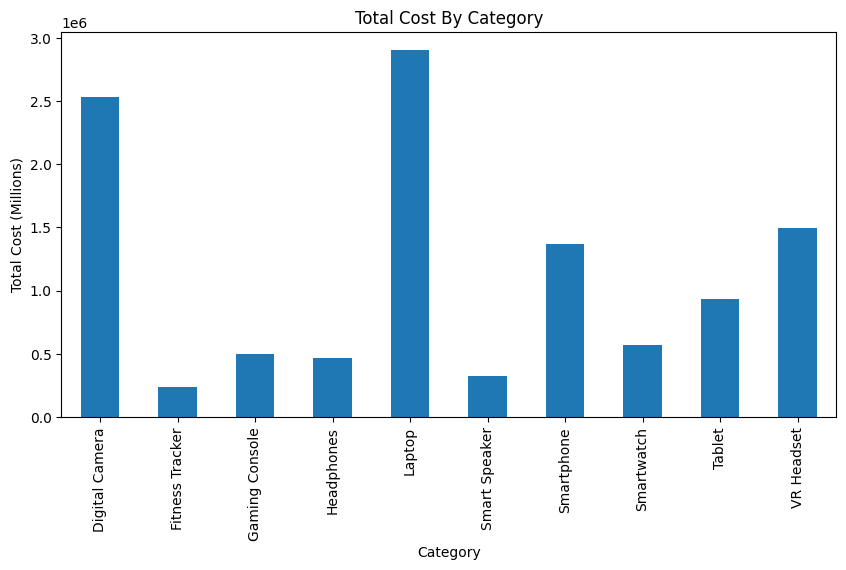

In [30]:
df.groupby('Category')['Total Cost'].sum().plot(kind='bar', x="Category", y="Total Cost", ylabel="Total Cost (Millions)", title="Total Cost By Category", figsize=(10, 5))